In [2]:
!pip install opendatasets

  Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
  Using cached kaggle-1.6.17-py3-none-any.whl
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached certifi-2024.12.14-py3-none-any.whl (164 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.9.24
    Uninstalling certifi-2022.9.24:
      Successfully uninstalled certifi-2022.9.24


In [3]:
!pip install kaggle

In [4]:
# !pip uninstall tensorflow -y

In [5]:
 !pip uninstall tensorflow numpy -y

Found existing installation: tensorflow 2.9.1
Uninstalling tensorflow-2.9.1:
  Successfully uninstalled tensorflow-2.9.1
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [6]:
 !pip install numpy==1.24

  Using cached numpy-1.24.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.55.2 requires numpy<1.23,>=1.18, but you have numpy 1.24.0 which is incompatible.


In [7]:
 !pip install tensorflow==2.10.0

  Using cached tensorflow-2.10.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (578.1 MB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl (30 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.0
    Uninstalling tensorboard-2.

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import shutil

2025-01-14 18:57:50.307952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-14 18:57:50.433522: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-14 18:57:50.470626: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 18:57:51.299808: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [9]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset')



Skipping, found downloaded files in "./brain-tumor-mri-dataset" (use force=True to force download)


In [10]:
image_size=299
batch_size=32
channels=3
epoch=20

In [11]:
base_dir="brain-tumor-mri-dataset"

In [12]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    image_size=(image_size, image_size),
    batch_size=batch_size

)

Found 7023 files belonging to 2 classes.


2025-01-14 18:57:54.701807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-14 18:57:54.707544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-14 18:57:54.707731: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-14 18:57:54.708237: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [13]:
class_name=dataset.class_names
class_name

['Testing', 'Training']

In [14]:
train_dir="brain-tumor-mri-dataset/Training"

In [15]:
training_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size

)

Found 5712 files belonging to 4 classes.


In [16]:
test_dir="brain-tumor-mri-dataset/Testing"

In [17]:
testing_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size

)

Found 1311 files belonging to 4 classes.


In [18]:
class_name=testing_dataset.class_names
class_name

['glioma', 'meningioma', 'notumor', 'pituitary']

In [19]:
len (training_dataset)


179

In [20]:
len (testing_dataset)

41

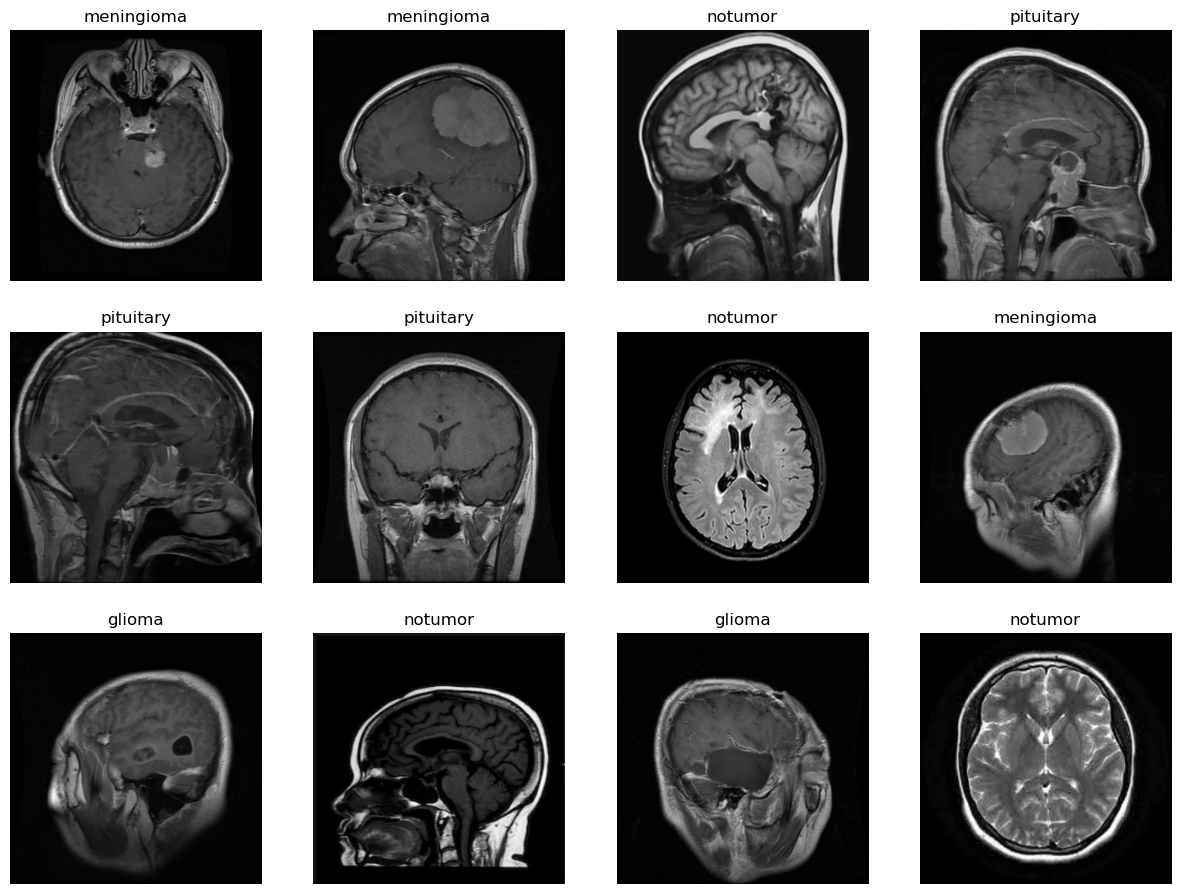

In [21]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in training_dataset.take(1):
  for i in range(min(12, len(image_batch))):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.axis("off")
    plt.title(class_name[label_batch[i]])

In [22]:
training_dataset=training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testing_dataset=testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception, preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img

# Using Exception model

In [24]:
model=Xception(
   
    weights="imagenet",
  
    input_shape=(image_size, image_size, channels)
    
)

In [25]:
pred=model.predict(training_dataset)

2025-01-14 18:58:07.005980: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2025-01-14 18:58:09.038742: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-14 18:58:09.039410: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-14 18:58:09.039446: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2025-01-14 18:58:09.040089: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-01-14 18:58:09.040173: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


179/179 [==============================] - 51s 208ms/step


In [26]:
decode_predictions(pred)

Teansfer learning

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception, preprocess_input,decode_predictions

In [28]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)  


In [29]:
train_ds = datagen.flow_from_directory(
    train_dir,  
    target_size=(150, 150),
    batch_size=32,

    subset='training' 
)


Found 4571 images belonging to 4 classes.


In [30]:
val_ds = datagen.flow_from_directory(
    train_dir,  
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
    subset='validation'  
)

Found 1141 images belonging to 4 classes.


In [31]:
train_ds.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [32]:
val_ds.class_indices


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [33]:
from tensorflow import keras

In [34]:
base_model=Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
base_model.trainable=False
    ###################################################
inputs=keras.Input(shape=(150,150,3))
base=base_model(inputs)
pooling=keras.layers.GlobalAveragePooling2D()
vectors=pooling(base)
output=keras.layers.Dense(4)(vectors)
model=keras.Model(inputs, output)
    ####################################################################
    
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    
    

In [35]:
history=model.fit(train_ds, epochs=20, validation_data=val_ds)


Epoch 1/20
143/143 [==============================] - 19s 114ms/step - loss: 0.6196 - accuracy: 0.8108 - val_loss: 0.9894 - val_accuracy: 0.7274
Epoch 2/20
143/143 [==============================] - 14s 97ms/step - loss: 0.2964 - accuracy: 0.8981 - val_loss: 0.6434 - val_accuracy: 0.8142
Epoch 3/20
143/143 [==============================] - 14s 96ms/step - loss: 0.2367 - accuracy: 0.9158 - val_loss: 0.9239 - val_accuracy: 0.7704
Epoch 4/20
143/143 [==============================] - 14s 95ms/step - loss: 0.2432 - accuracy: 0.9197 - val_loss: 0.8310 - val_accuracy: 0.7958
Epoch 5/20
143/143 [==============================] - 14s 96ms/step - loss: 0.1600 - accuracy: 0.9438 - val_loss: 0.7644 - val_accuracy: 0.8186
Epoch 6/20
143/143 [==============================] - 14s 97ms/step - loss: 0.1971 - accuracy: 0.9335 - val_loss: 0.7759 - val_accuracy: 0.8265
Epoch 7/20
143/143 [==============================] - 14s 97ms/step - loss: 0.1157 - accuracy: 0.9565 - val_loss: 0.9980 - val_accuracy

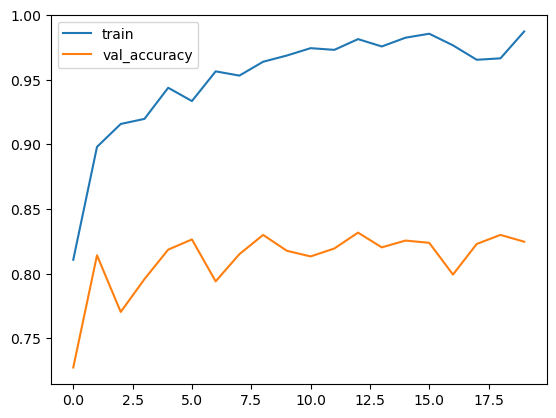

In [36]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend();

Adjusting the learning rate

In [37]:
def make_model(learning_rate=0.01):
    
    base_model=Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable=False
    ###################################################
    inputs=keras.Input(shape=(150,150,3))
    base=base_model(inputs)
    pooling=keras.layers.GlobalAveragePooling2D()
    vectors=pooling(base)
    output=keras.layers.Dense(4)(vectors)
    model=keras.Model(inputs, output)
    ####################################################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    
    return model

# Trying different learning rates to take the best

In [38]:
score={}
for ir in [0.0001, 0.001, 0.01, 0.1]:
    print (ir)
    model=make_model (learning_rate=ir)
    history=model.fit(train_ds, epochs=10, validation_data=val_ds)
    score[ir]=history.history
    print()
    print()

In [39]:
import numpy as np

In [40]:
for ir, hist in score.items():
  plt.plot(hist["accuracy"], label=ir)
  plt.xticks(np.arange(10))
  plt.legend()


In [41]:
#so a good learning rate is 0.01

# Checkpointing 

In [42]:
# model.save_weights('model_v1.h5', save_format='h5')

In [43]:
checkpoint=keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [44]:
learning_rate=0.01
model=make_model (learning_rate=learning_rate)
history=model.fit(train_ds,
                  epochs=15,
                  validation_data=val_ds,
                  callbacks=[checkpoint]
                 )

# Adding more layers

In [45]:
def make_model(learning_rate=0.01,size_inner=100):
    
    base_model=Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable=False
    ###################################################
    inputs=keras.Input(shape=(150,150,3))
    base=base_model(inputs)
    pooling=keras.layers.GlobalAveragePooling2D()
    vectors=pooling(base)
    inner=keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    output=keras.layers.Dense(4)(inner)
    model=keras.Model(inputs, output)
    ####################################################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    
    return model

In [46]:
learning_rate=0.01

score={}
for size in [10,100,1000]:
    print (size)
    model=make_model (learning_rate=learning_rate, size_inner=size)
    history=model.fit(train_ds, epochs=10, validation_data=val_ds)
    score[size]=history.history
    print()
    print()

In [47]:
for size, hist in score.items():
  plt.plot(hist["accuracy"], label='val=%s'% size)
  plt.xticks(np.arange(10))
  plt.legend()

# Regulirization and dropout

In [ ]:
def make_model(learning_rate=0.01,size_inner=100, droprate=0.4):
    
    base_model=Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable=False
    ###################################################
    inputs=keras.Input(shape=(150,150,3))
    base=base_model(inputs)
    pooling=keras.layers.GlobalAveragePooling2D()
    vectors=pooling(base)
    inner=keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop=keras.layers.Dropout(droprate)(inner)
    output=keras.layers.Dense(4)(drop)
    model=keras.Model(inputs, output)
    ####################################################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    
    return model

# Trying different learning rates

In [67]:
learning_rate=0.01
size=100
score={}
for droprate in [0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    print (droprate)
    model=make_model (learning_rate=learning_rate,
                      size_inner=size,
                      droprate=droprate
                     )
    history=model.fit(train_ds, epochs=25, validation_data=val_ds)
    score[droprate]=history.history
    print()
    print()

In [68]:
for droprate, hist in score.items():
  plt.plot(hist["accuracy"], label='val=%s'% droprate)
  
  

  plt.legend()

In [69]:
hist=score[0.0]
plt.plot(hist["val_accuracy"], label='val=%s'% droprate)
plt.plot(hist["accuracy"], label='val=%s'% droprate)
plt.legend();

In [70]:
hist=score[0.2]
plt.plot(hist["val_accuracy"], label='val=%s'% droprate)
plt.plot(hist["accuracy"], label='val=%s'% droprate)
plt.legend();

In [71]:
hist=score[0.3]
plt.plot(hist["val_accuracy"], label='val=%s'% droprate)
plt.plot(hist["accuracy"], label='val=%s'% droprate)
plt.legend();

In [72]:
hist=score[0.4]
plt.plot(hist["val_accuracy"], label='val=%s'% droprate)
plt.plot(hist["accuracy"], label='val=%s'% droprate)
plt.legend();

In [73]:
hist=score[0.5]
plt.plot(hist["val_accuracy"], label='val=%s'% droprate)
plt.plot(hist["accuracy"], label='val=%s'% droprate)
plt.legend();

In [74]:
hist=score[0.6]
plt.plot(hist["val_accuracy"], label='val=%s'% droprate)
plt.plot(hist["accuracy"], label='val=%s'% droprate)
plt.legend();

In [75]:
hist=score[0.7]
plt.plot(hist["val_accuracy"], label='val=%s'% droprate)
plt.plot(hist["accuracy"], label='val=%s'% droprate)
plt.legend();

In [76]:
hist=score[0.8]
plt.plot(hist["val_accuracy"], label='val=%s'% droprate)
plt.plot(hist["accuracy"], label='val=%s'% droprate)
plt.legend();

In [77]:
#so will use 0.3 as our droprate it showed good performance

# Data Augmentation

In [92]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                          # When I tried data augmentation it wasnt doing anything good to the performance   
                             validation_split=0.2)  




In [93]:
train_ds = datagen.flow_from_directory(
    train_dir,  
    target_size=(150, 150),
    batch_size=32,

    subset='training',
    class_mode='categorical'
)


Found 4571 images belonging to 4 classes.


In [94]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  
)

In [95]:
val_ds = val_datagen.flow_from_directory(
    train_dir,  
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
    subset='validation',
    class_mode='categorical'
)

Found 1141 images belonging to 4 classes.


In [96]:
learning_rate=0.01
size=100
droprate=0.3

In [97]:
model=make_model (learning_rate=learning_rate,
                      size_inner=size,
                      droprate=droprate
                     )
history=model.fit(train_ds, epochs=40, validation_data=val_ds)

Epoch 1/40
143/143 [==============================] - 17s 102ms/step - loss: 0.7435 - accuracy: 0.7795 - val_loss: 0.6946 - val_accuracy: 0.7283
Epoch 2/40
143/143 [==============================] - 14s 97ms/step - loss: 0.4119 - accuracy: 0.8563 - val_loss: 0.7760 - val_accuracy: 0.7581
Epoch 3/40
143/143 [==============================] - 14s 98ms/step - loss: 0.3720 - accuracy: 0.8552 - val_loss: 0.6809 - val_accuracy: 0.7905
Epoch 4/40
143/143 [==============================] - 14s 99ms/step - loss: 0.3323 - accuracy: 0.8742 - val_loss: 0.6057 - val_accuracy: 0.8098
Epoch 5/40
143/143 [==============================] - 14s 97ms/step - loss: 0.3304 - accuracy: 0.8744 - val_loss: 0.6799 - val_accuracy: 0.7809
Epoch 6/40
143/143 [==============================] - 14s 98ms/step - loss: 0.3453 - accuracy: 0.8600 - val_loss: 0.5747 - val_accuracy: 0.7975
Epoch 7/40
143/143 [==============================] - 14s 98ms/step - loss: 0.3259 - accuracy: 0.8718 - val_loss: 0.6419 - val_accuracy

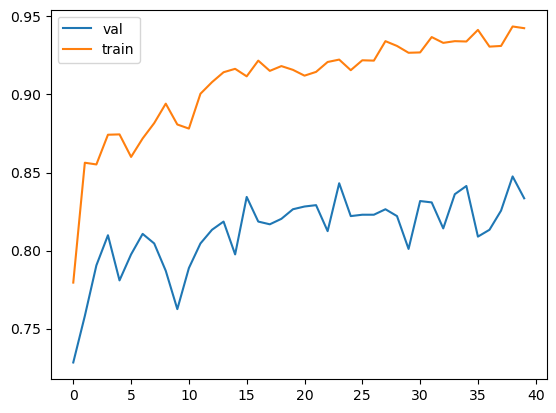

In [98]:
hist=history.history
plt.plot(hist["val_accuracy"], label='val')
plt.plot(hist["accuracy"], label='train')
plt.legend();

# Training a larger model

In [99]:
def make_model(input_size=150, learning_rate=0.01,size_inner=100, droprate=0.4):
    
    base_model=Xception(weights='imagenet', include_top=False, input_shape=(input_size,input_size,3))
    base_model.trainable=False
    ###################################################
    inputs=keras.Input(shape=(input_size,input_size,3))
    base=base_model(inputs)
    pooling=keras.layers.GlobalAveragePooling2D()
    vectors=pooling(base)
    inner=keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop=keras.layers.Dropout(droprate)(inner)
    output=keras.layers.Dense(4)(drop)
    model=keras.Model(inputs, output)
    ####################################################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    
    return model

In [100]:
input_size=299

In [101]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             zoom_range=0.1,
                             
                            
                             
                             validation_split=0.2)  


train_ds = datagen.flow_from_directory(
    train_dir,  
    target_size=(input_size, input_size),
    batch_size=32,

    subset='training',
    class_mode='categorical'
)
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  
)
val_ds = val_datagen.flow_from_directory(
    train_dir,  
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False,
    subset='validation',
    class_mode='categorical'
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [102]:
checkpoint=keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [105]:
learning_rate=0.01
size=100
droprate=0.3

model=make_model (
    input_size=input_size,
    learning_rate=learning_rate,
                      size_inner=size,
                      droprate=droprate
                     )
history=model.fit(train_ds, epochs=40, validation_data=val_ds,callbacks=[checkpoint])

Epoch 1/40
143/143 [==============================] - 91s 616ms/step - loss: 0.6523 - accuracy: 0.7744 - val_loss: 0.6891 - val_accuracy: 0.7432
Epoch 2/40
143/143 [==============================] - 88s 617ms/step - loss: 0.3650 - accuracy: 0.8595 - val_loss: 0.5217 - val_accuracy: 0.8028
Epoch 3/40
143/143 [==============================] - 88s 617ms/step - loss: 0.3212 - accuracy: 0.8808 - val_loss: 0.4319 - val_accuracy: 0.8361
Epoch 4/40
143/143 [==============================] - 88s 615ms/step - loss: 0.3181 - accuracy: 0.8851 - val_loss: 0.4627 - val_accuracy: 0.8352
Epoch 5/40
143/143 [==============================] - 90s 625ms/step - loss: 0.3063 - accuracy: 0.8886 - val_loss: 0.4607 - val_accuracy: 0.8317
Epoch 6/40
143/143 [==============================] - 91s 636ms/step - loss: 0.2673 - accuracy: 0.9046 - val_loss: 0.6267 - val_accuracy: 0.8098
Epoch 7/40
143/143 [==============================] - 91s 635ms/step - loss: 0.2581 - accuracy: 0.9013 - val_loss: 0.5182 - val_ac

KeyboardInterrupt: 

# Using the model

In [106]:
model=keras.models.load_model('xception_v2_17_0.866.keras')

In [108]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input
                             
                             
                            
                             
                           )  


test_ds = datagen.flow_from_directory(
    test_dir,  
    target_size=(299, 299),
    batch_size=32,
    shuffle=False,

    class_mode='categorical'
)

Found 1311 images belonging to 4 classes.


In [109]:
model.evaluate(test_ds)

41/41 [==============================] - 12s 259ms/step - loss: 0.2691 - accuracy: 0.8993


[0.26908475160598755, 0.8993135094642639]